# Importing important libraries 

In [29]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection
import numpy as np
from collections import Counter
import collections
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Red wine

In [70]:
df1= pd.read_csv( 'https://raw.githubusercontent.com/sharmaroshan/Wine-Quality-Predictions/master/winequality-red.csv',delimiter=",")

In [71]:
df1.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [72]:
df1.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [73]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [74]:
df1.isnull().values.any()

False

# Bar plot

No handles with labels found to put in legend.


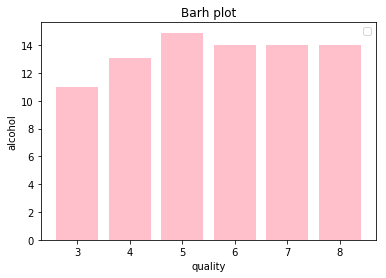

In [75]:
plt.bar(df1['quality'],df1['alcohol'],color='pink')
plt.title('Barh plot')
plt.xlabel ('quality')
plt.ylabel ('alcohol')
plt.legend()
plt.show()

# Histogram 

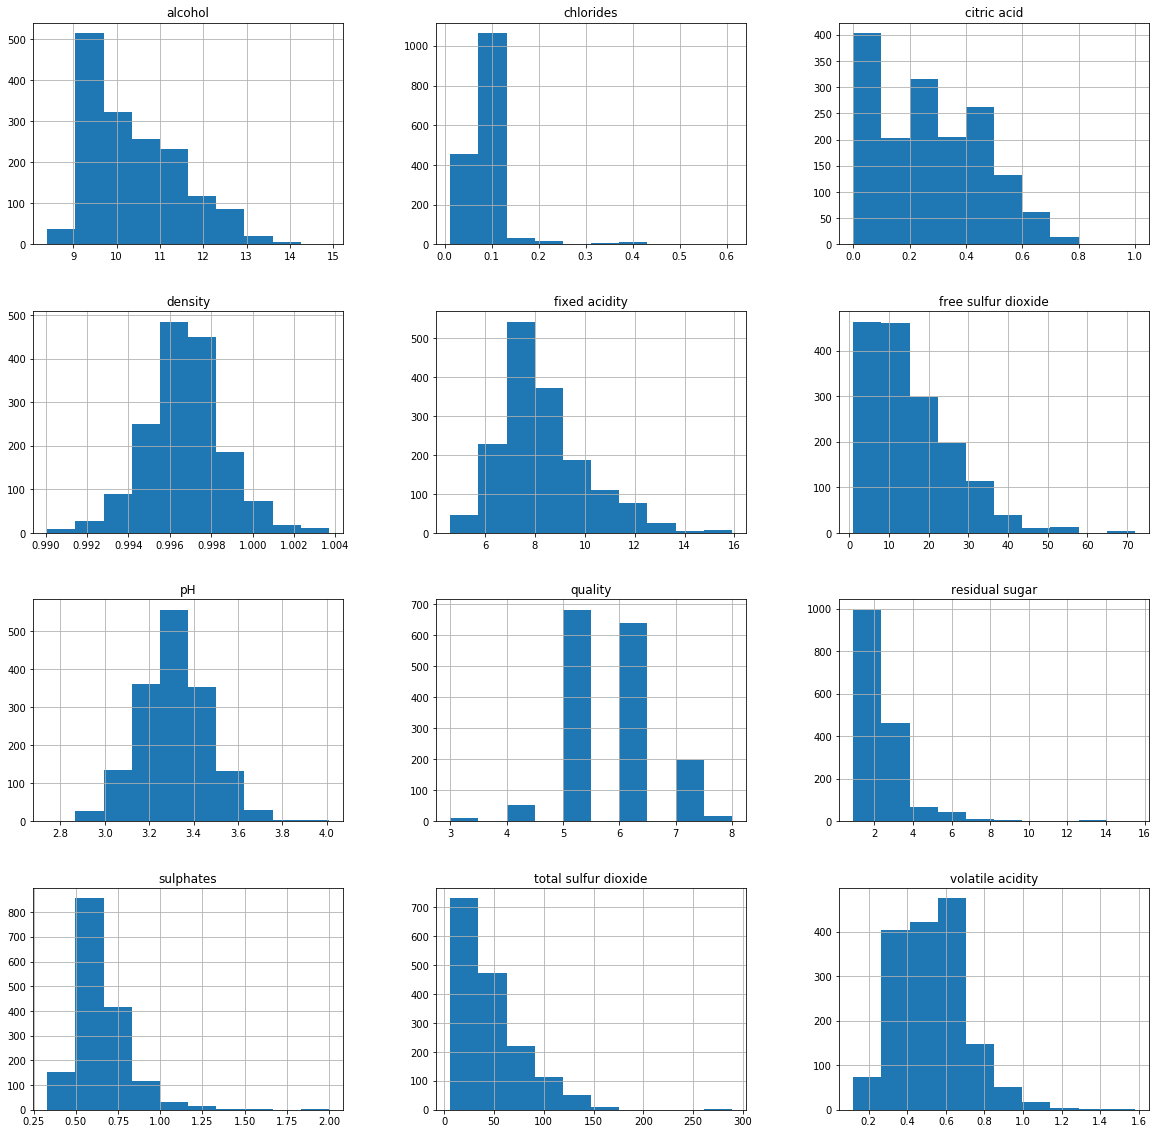

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df1.hist(bins=10, figsize=(20,20))
plt.show()

# Heatmap

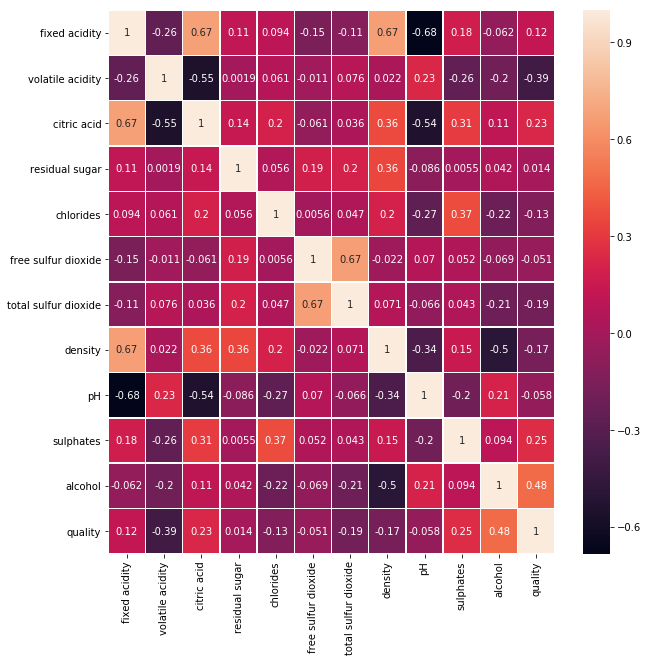

In [77]:
corr_matrix=df1.corr()
figure,ax=plt.subplots(figsize=(10,10))
sns.heatmap(corr_matrix, annot=True,linewidth=0.5,ax=ax)

# Pairplot 

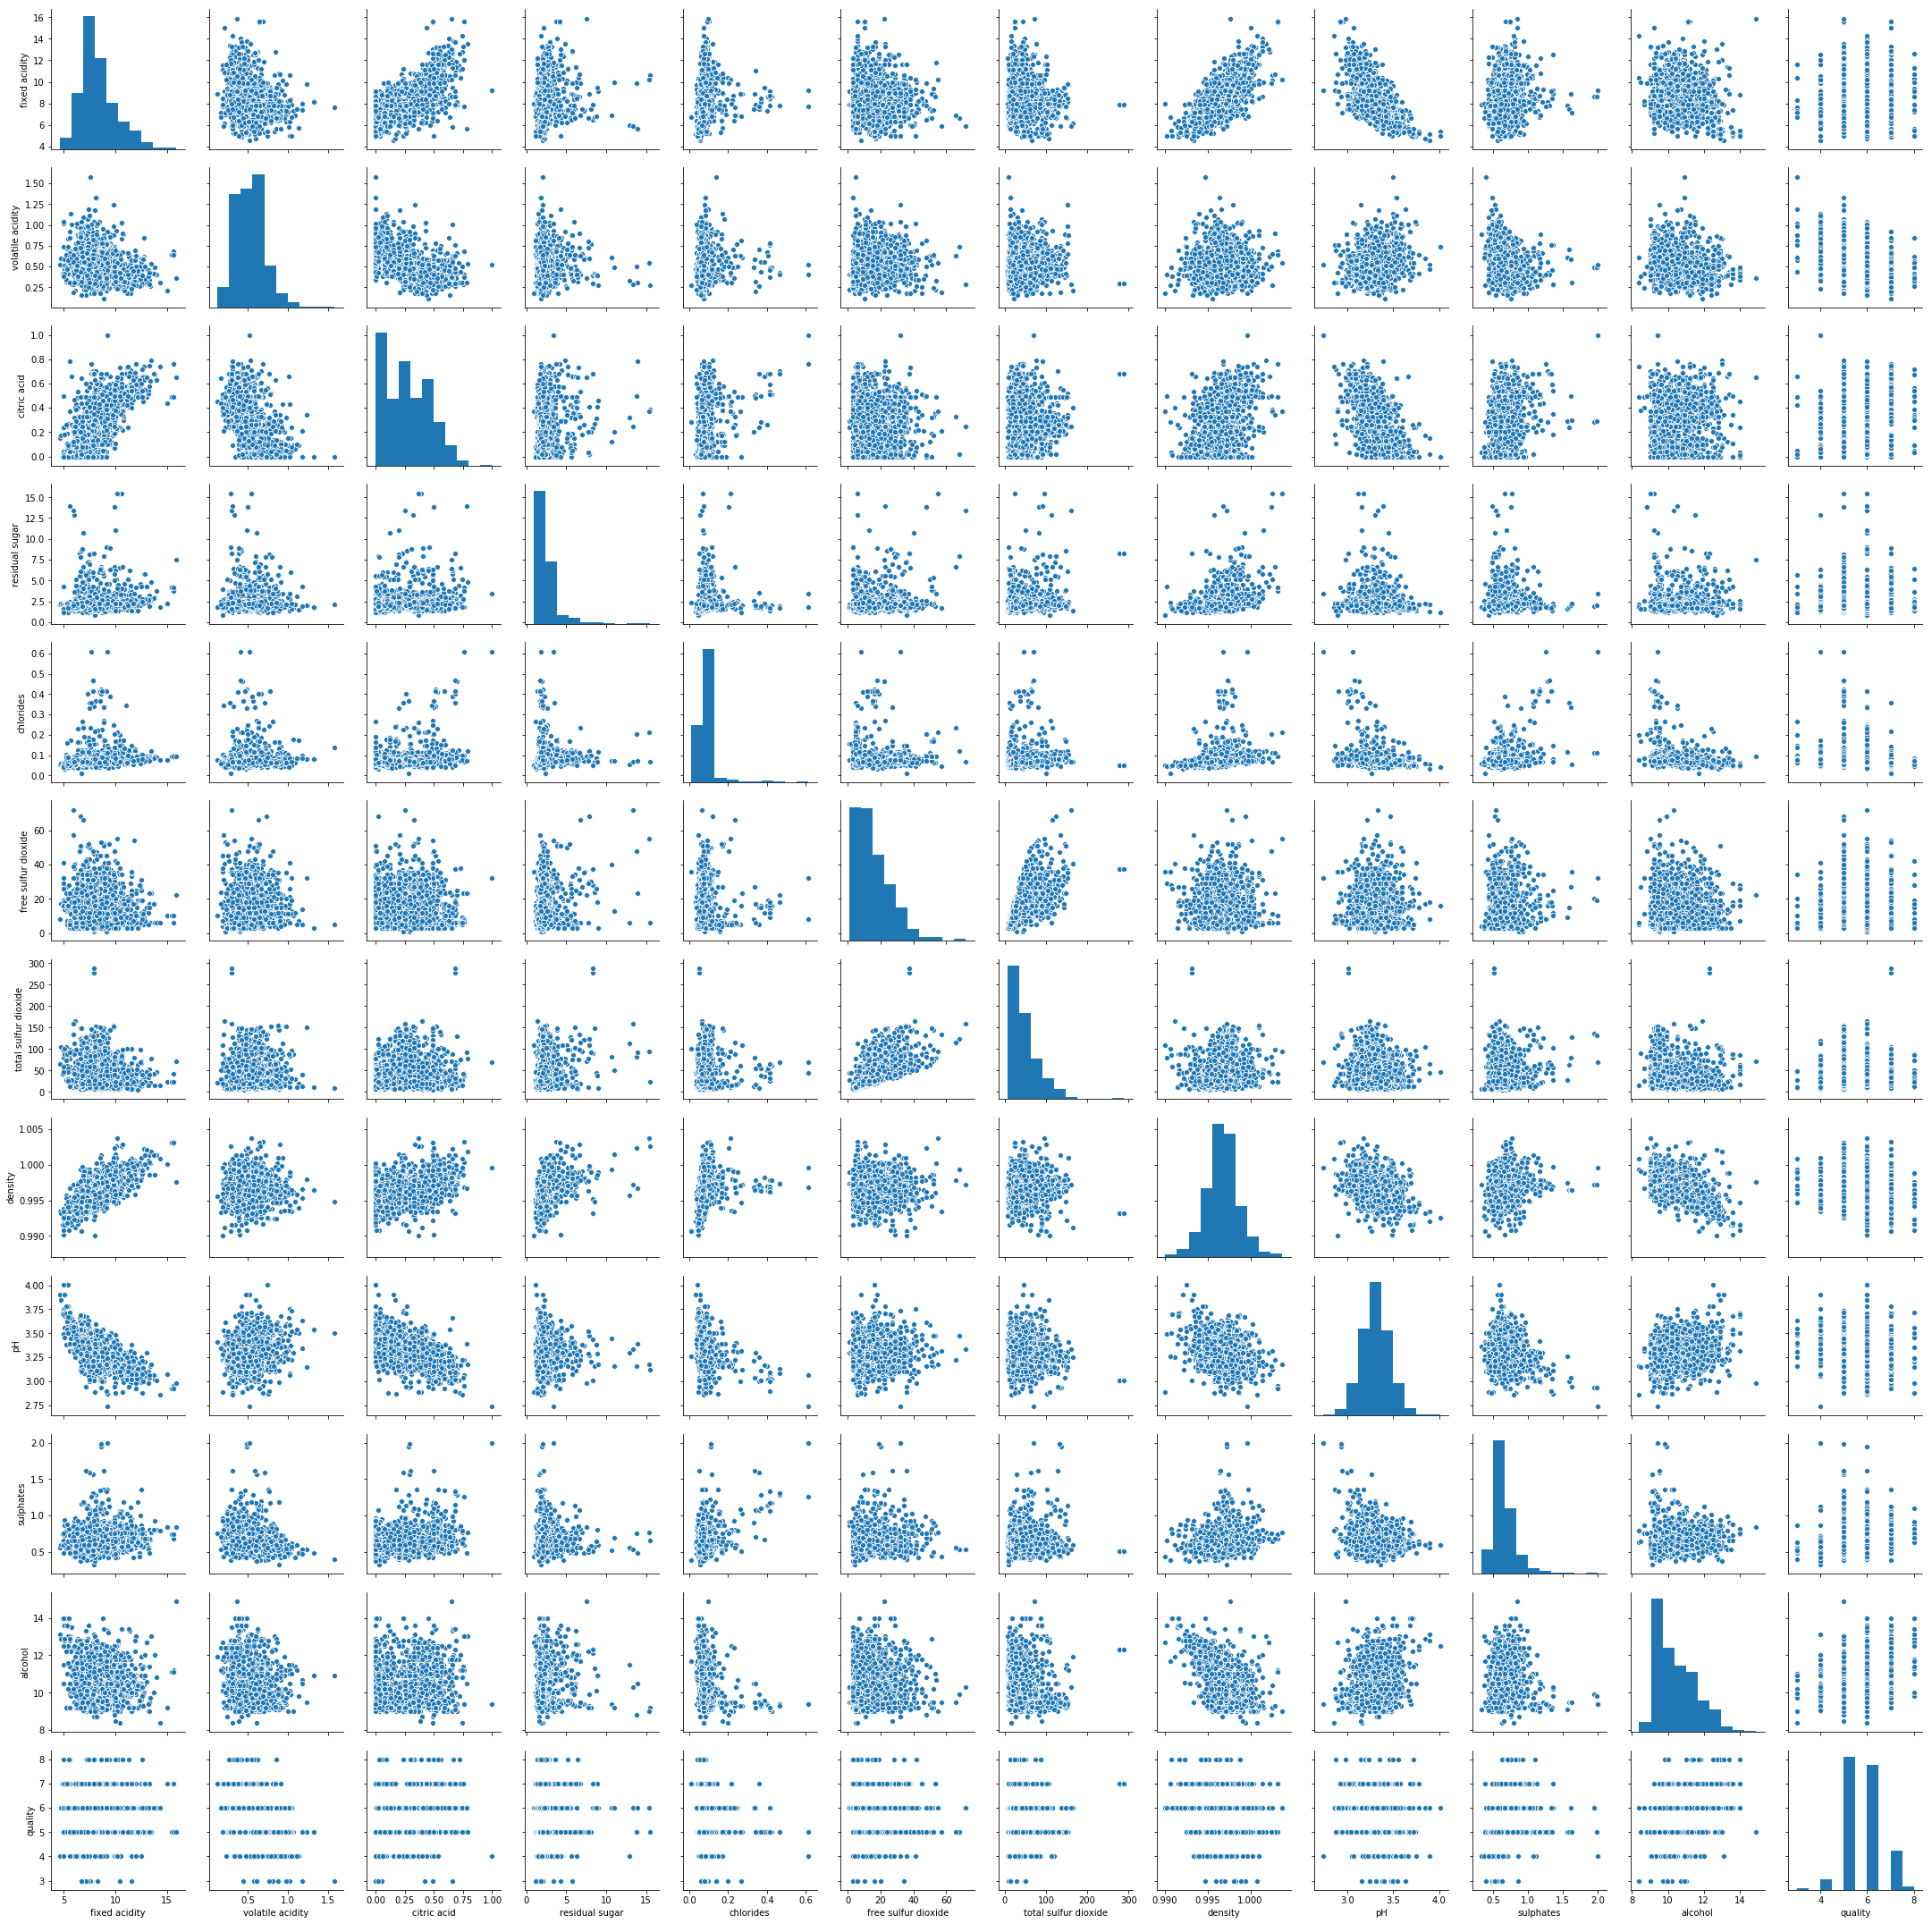

In [78]:
sns.pairplot (df1)

# Box plot 

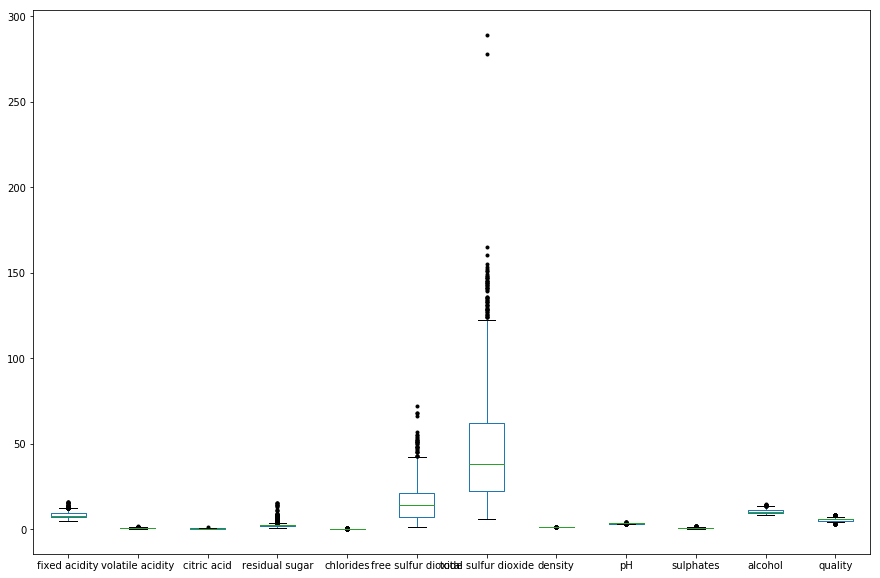

In [79]:
df1.plot.box (sym='k.',figsize=(15,10))
plt.show ()

In [80]:
df1.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

# Count plot

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

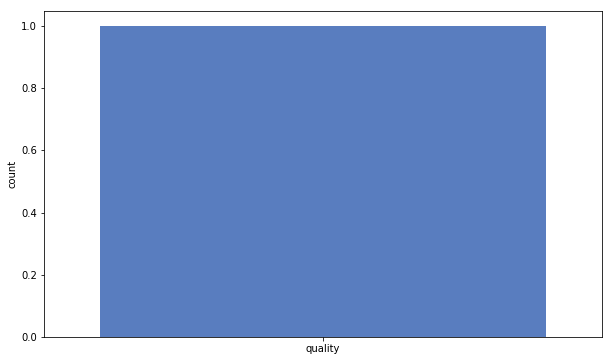

In [81]:
plt.figure(figsize=(10, 6))
sns.countplot(["quality"], palette="muted")
df1["quality"].value_counts()

In [82]:
corr_matrix['quality'].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64

In [83]:
quality = df1["quality"].values
category = []
for num in quality:
    if num < 5.5:
        category.append("Low")
    else:
        category.append("High")

In [84]:
[(i,category.count(i)) for i in set (category)]

[('Low', 744), ('High', 855)]

In [14]:
df_copy = df.copy()

In [16]:
df.drop(['free sulfur dioxide', 'residual sugar', 'pH', 'chlorides', 'fixed acidity'], axis=1, inplace=True)
df.head()

,volatile acidity,citric acid,total sulfur dioxide,density,sulphates,alcohol,quality
0,0.27,0.36,170.0,1.0010,0.45,8.8,6
1,0.30,0.34,132.0,0.9940,0.49,9.5,6
2,0.28,0.40,97.0,0.9951,0.44,10.1,6
3,0.23,0.32,186.0,0.9956,0.40,9.9,6
4,0.23,0.32,186.0,0.9956,0.40,9.9,6


In [17]:
from sklearn.preprocessing import StandardScaler
import numpy as np

scaler = StandardScaler()
X = df.drop('quality', axis=1)
X = scaler.fit_transform(X)
new_df = pd.DataFrame(X, columns=df.drop('quality',axis=1).columns)
new_df['quality'] = df['quality'] 
new_df.head()

,volatile acidity,citric acid,total sulfur dioxide,density,sulphates,alcohol,quality
0,-0.081770,0.213280,0.744565,2.331512,-0.349184,-1.393152,6
1,0.215896,0.048001,-0.149685,-0.009154,0.001342,-0.824276,6
2,0.017452,0.543838,-0.973336,0.358665,-0.436816,-0.336667,6
3,-0.478657,-0.117278,1.121091,0.525855,-0.787342,-0.499203,6
4,-0.478657,-0.117278,1.121091,0.525855,-0.787342,-0.499203,6


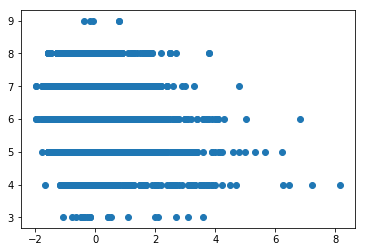

In [18]:
plt.scatter(new_df['volatile acidity'], new_df['quality'])
plt.show()

# White wine 

In [85]:
df2= pd.read_csv(
    'http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv', delimiter=";")

In [86]:
df2.head ()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [87]:
df2.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [88]:
df2.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
fixed acidity           4898 non-null float64
volatile acidity        4898 non-null float64
citric acid             4898 non-null float64
residual sugar          4898 non-null float64
chlorides               4898 non-null float64
free sulfur dioxide     4898 non-null float64
total sulfur dioxide    4898 non-null float64
density                 4898 non-null float64
pH                      4898 non-null float64
sulphates               4898 non-null float64
alcohol                 4898 non-null float64
quality                 4898 non-null int64
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [91]:
df2.isnull().values.any()

False

In [92]:
df2.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

# Bar plot

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

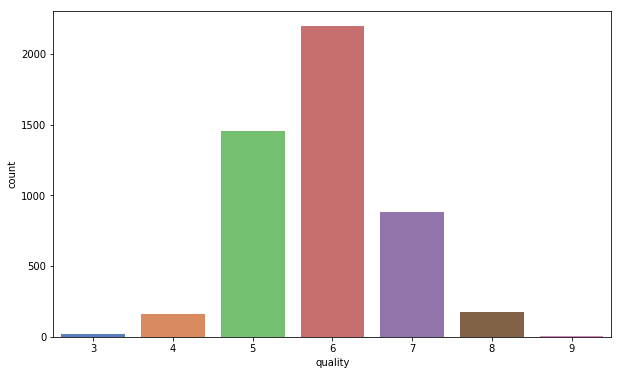

In [94]:
plt.figure(figsize=(10, 6))
sns.countplot(df2["quality"], palette="muted")
df2["quality"].value_counts()

In [39]:
quality = wine["quality"].values
category = []
for num in quality:
    if num < 5.5:
        category.append("Low")
    else:
        category.append("High")

# Box plot 

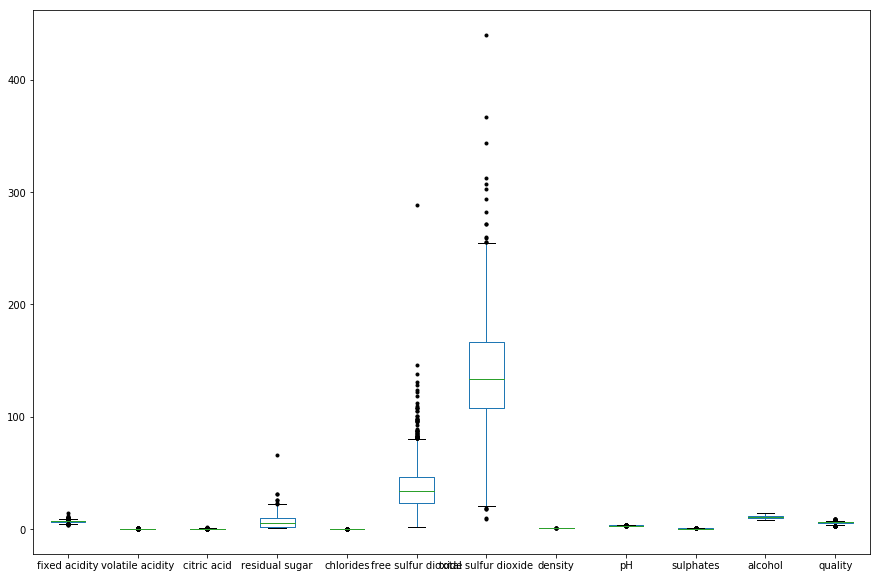

In [95]:
df2.plot.box (sym='k.',figsize=(15,10))
plt.show ()

In [96]:
[(i, category.count(i)) for i in set(category)]

[('Low', 744), ('High', 855)]

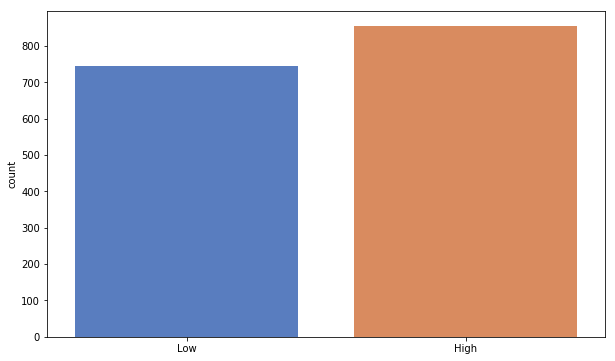

In [97]:
plt.figure(figsize=(10, 6))
sns.countplot(category, palette="muted")

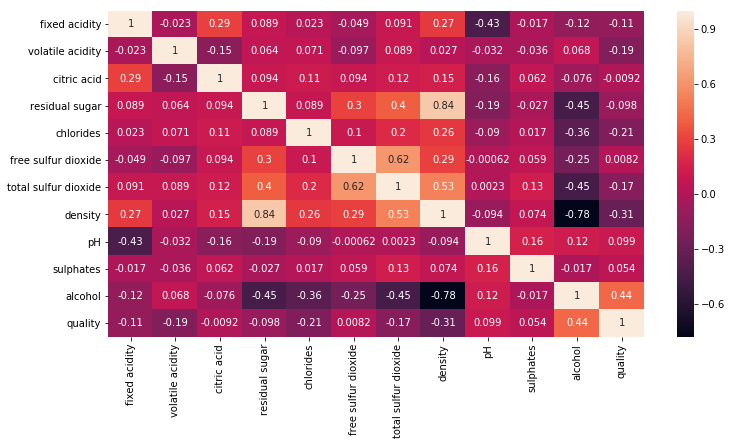

In [98]:
plt.figure(figsize=(12, 6))
sns.heatmap(df2.corr(), annot=True)

# Histogram 

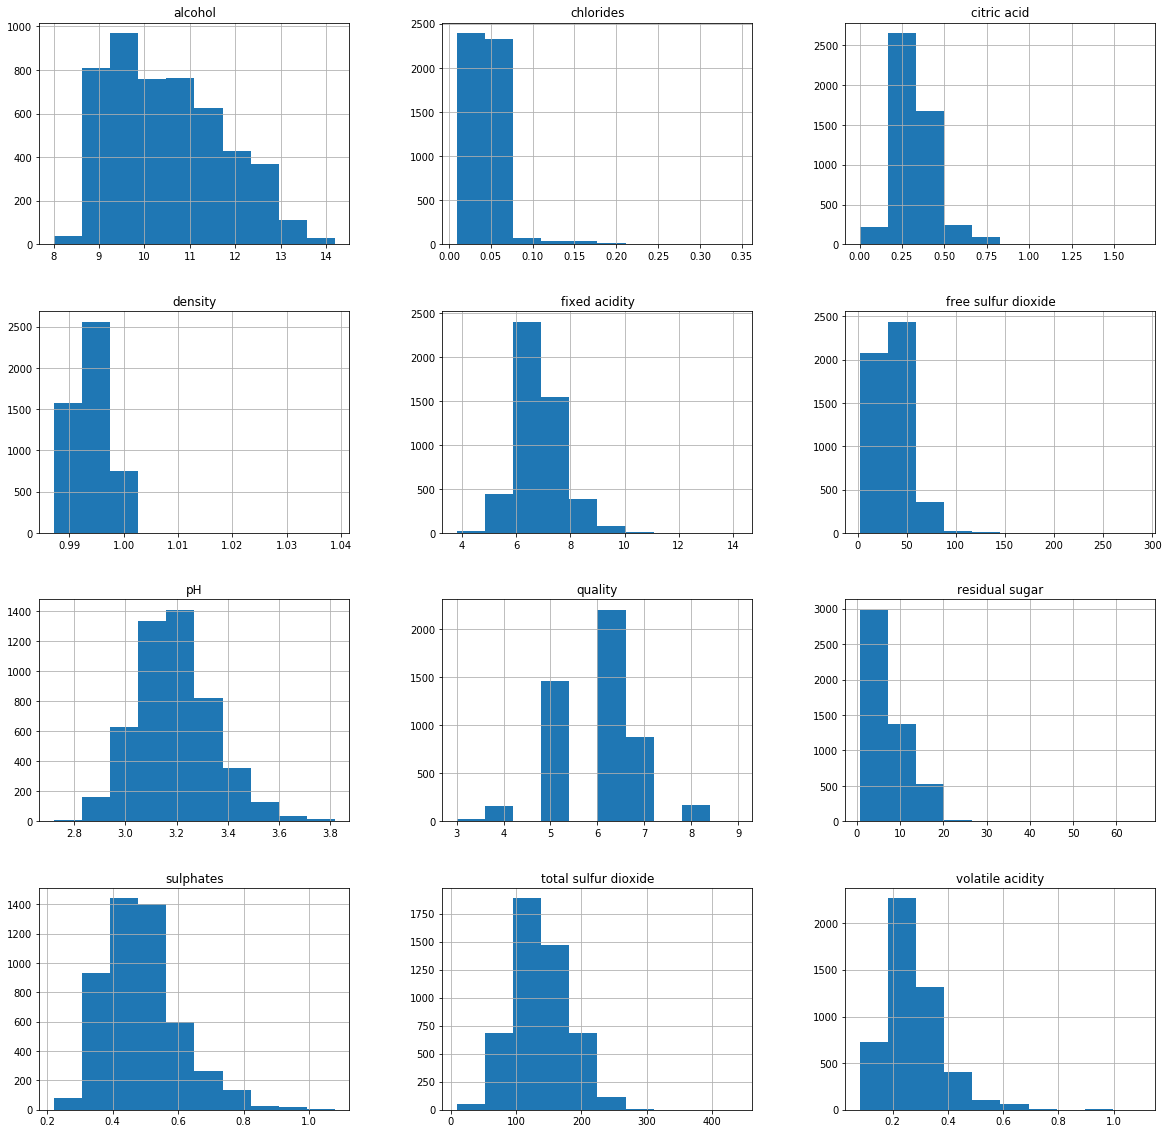

In [100]:
import matplotlib.pyplot as plt
import seaborn as sns
df2.hist (bins=10,figsize=(20,20))
plt.show ()

# Pairplot 

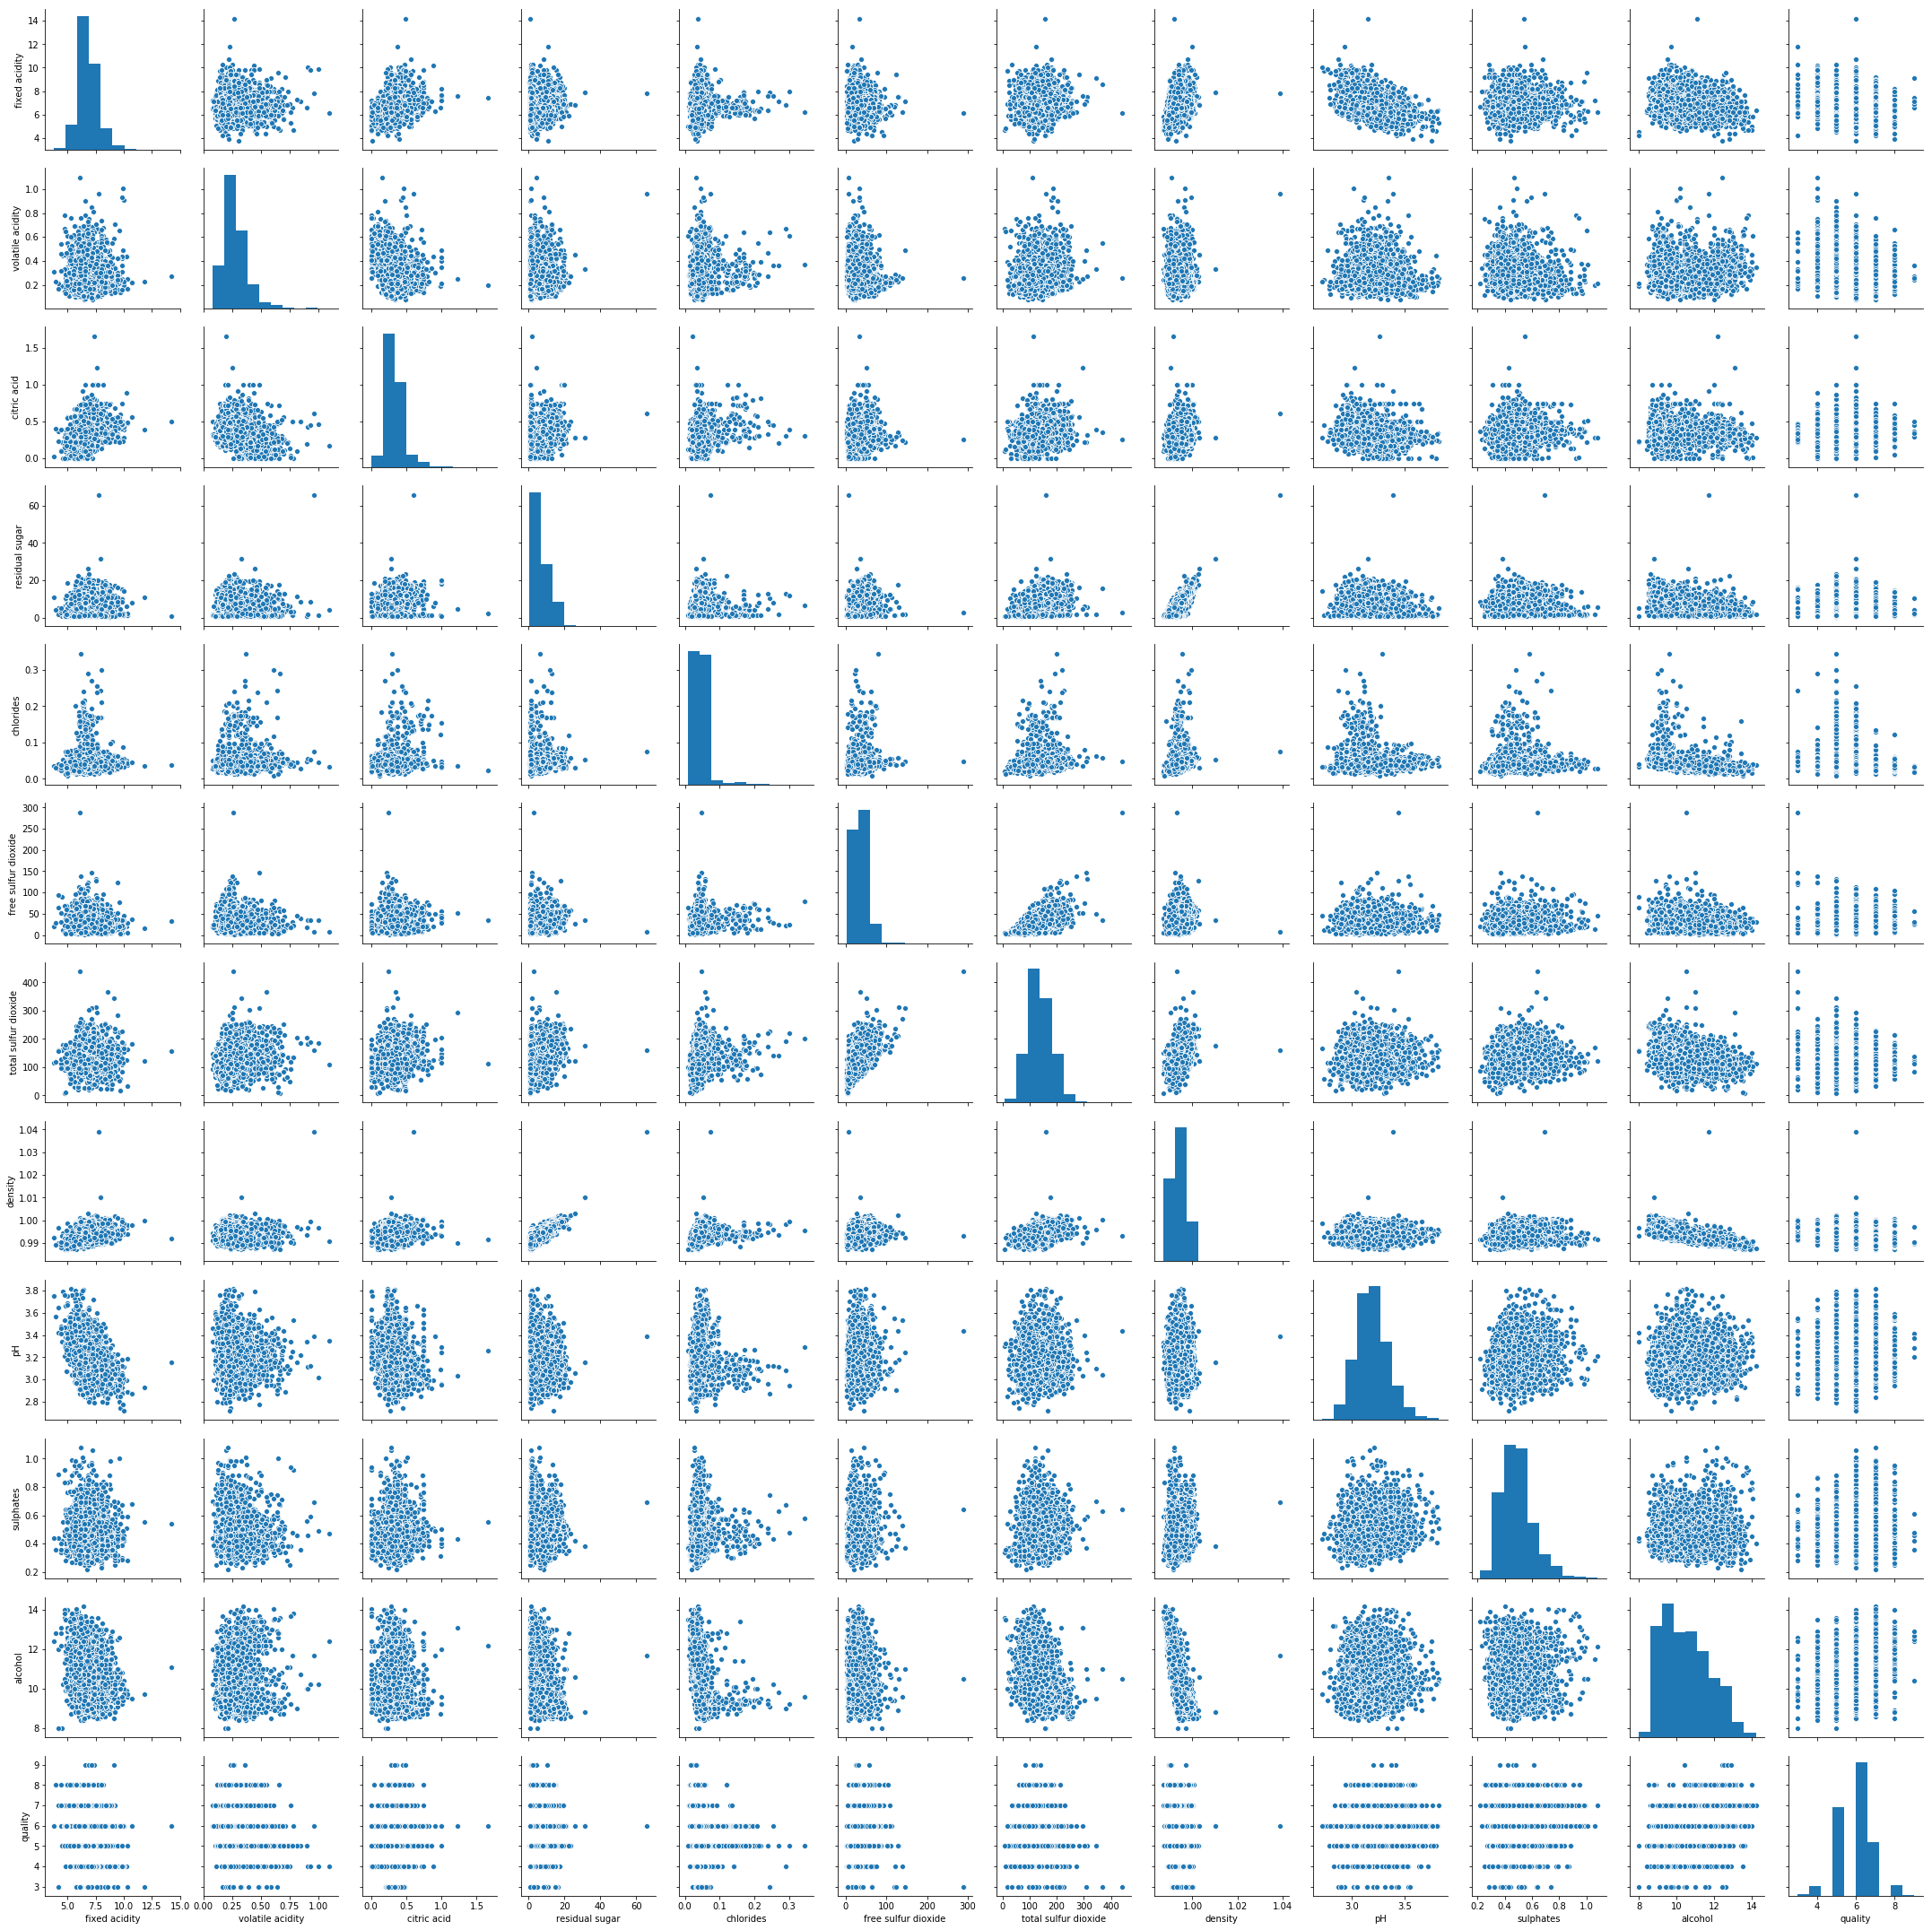

In [101]:
sns.pairplot(df2)

In [105]:
wine_data = df1.append(df2)

In [106]:
wine_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.400000,5
1,7.8,0.880,0.00,2.60,0.098,25.0,67.0,0.99680,3.20,0.68,9.800000,5
2,7.8,0.760,0.04,2.30,0.092,15.0,54.0,0.99700,3.26,0.65,9.800000,5
3,11.2,0.280,0.56,1.90,0.075,17.0,60.0,0.99800,3.16,0.58,9.800000,6
4,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.400000,5
5,7.4,0.660,0.00,1.80,0.075,13.0,40.0,0.99780,3.51,0.56,9.400000,5
6,7.9,0.600,0.06,1.60,0.069,15.0,59.0,0.99640,3.30,0.46,9.400000,5
7,7.3,0.650,0.00,1.20,0.065,15.0,21.0,0.99460,3.39,0.47,10.000000,7
8,7.8,0.580,0.02,2.00,0.073,9.0,18.0,0.99680,3.36,0.57,9.500000,7
9,7.5,0.500,0.36,6.10,0.071,17.0,102.0,0.99780,3.35,0.80,10.500000,5
